In [1]:
!pip uninstall -y transformers
!pip install transformers
!pip install accelerate -U
!pip install transformers datasets

Found existing installation: transformers 4.52.4
Uninstalling transformers-4.52.4:
  Successfully uninstalled transformers-4.52.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.3 MB/s eta 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
#Read the dataset
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
#Using the relevant columns
df = df[['airline_sentiment', 'text']].copy()
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

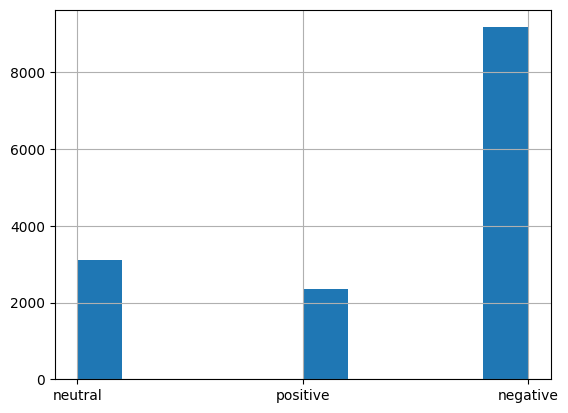

In [6]:
df['airline_sentiment'].hist()

In [7]:
#Map labels to integers
label_map = {'positive' : 1, 'negative' : 0, 'neutral' : 2}  # map the labels to integers which is required for neural networks.
df['labels'] = df['airline_sentiment'].map(label_map)

In [8]:
df2 = df[['text','labels']]
df2.head()

,text,labels
0,@VirginAmerica What @dhepburn said.,2
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,2
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


In [9]:
#Requirements for hugging face dataset
df2.columns =['sentence', 'label'] # saving new csv file with new column names specially important is to change target as label
df2.to_csv('data.csv', index = None) # Converting to csv is important for using hugging face dataset

In [10]:
!head data.csv # two columns in new csv with head in the first column and label in the second column

sentence,label
@VirginAmerica What @dhepburn said.,2
@VirginAmerica plus you've added commercials to the experience... tacky.,1
@VirginAmerica I didn't today... Must mean I need to take another trip!,2
"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0
@VirginAmerica and it's a really big bad thing about it,0
"@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA",0
"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",1
"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",2


In [13]:
#Transfrming to hugging face dataset
from datasets import Dataset


df = pd.read_csv("data.csv")
raw_dataset = Dataset.from_pandas(df)


In [14]:
raw_dataset

Dataset({
    features: ['sentence', 'label'],
    num_rows: 14640
})

In [16]:
#Split
data = raw_dataset.train_test_split(test_size=0.3, seed=42)

data

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4392
    })
})

In [17]:
#Tokeniser
from transformers import AutoTokenizer
checkpoint ="distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [18]:
# Write function to pass an argument that truncation = True

def tokenize_func(batch):
  return tokenizer(batch['sentence'], truncation = True) # Trainer will handle the padding

tokenized_datasets = data.map(tokenize_func, batched = True)

Map:   0%|          | 0/10248 [00:00<?, ? examples/s]

Map:   0%|          | 0/4392 [00:00<?, ? examples/s]

In [19]:
# Import Training Argumets, trainer and Model

from transformers import TrainingArguments, AutoModelForSequenceClassification, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels =3
)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
#Set training arguements

training_args = TrainingArguments(
    output_dir= 'training_dir',
    eval_strategy='epoch',  # means if we want to evaluate model on validation set
    save_strategy='epoch',        # means save model after every epoch which is not a good idea because you will runout of colab space
    num_train_epochs= 3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size= 64
)

In [22]:
trainer = Trainer(
    model,
    training_args,
    train_dataset = tokenized_datasets['train'],
    eval_dataset = tokenized_datasets['test'],
    tokenizer = tokenizer,
)

<ipython-input-22-501794527>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [23]:
#Train the model
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: anotherfakeofhis (anotherfakeofhis-none) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,0.512400,0.462294
2,0.328500,0.467107
3,0.232500,0.580056


TrainOutput(global_step=1923, training_loss=0.31139850666048124, metrics={'train_runtime': 208.2672, 'train_samples_per_second': 147.618, 'train_steps_per_second': 9.233, 'total_flos': 358192024288848.0, 'train_loss': 0.31139850666048124, 'epoch': 3.0})

In [24]:
!ls training_dir # we can see the three checkpoints because model is trained on three epochs

checkpoint-1282  checkpoint-1923  checkpoint-641  runs


In [25]:
#Load the save model
from transformers import pipeline
savemodel = pipeline('text-classification', model = 'training_dir/checkpoint-1282', device = 0)

Device set to use cuda:0


In [26]:
#Get test data to test the model

data['test'] # access the test set
y_pred = savemodel(data['test']['sentence']) # run the test set on our saved model to get the test predictions

y_pred



[{'label': 'LABEL_1', 'score': 0.9317724108695984},
 {'label': 'LABEL_1', 'score': 0.9123335480690002},
 {'label': 'LABEL_0', 'score': 0.6178567409515381},
 {'label': 'LABEL_1', 'score': 0.5854761004447937},
 {'label': 'LABEL_1', 'score': 0.6940216422080994},
 {'label': 'LABEL_0', 'score': 0.9958691000938416},
 {'label': 'LABEL_2', 'score': 0.8164784908294678},
 {'label': 'LABEL_2', 'score': 0.8470340967178345},
 {'label': 'LABEL_2', 'score': 0.48648107051849365},
 {'label': 'LABEL_0', 'score': 0.9962432384490967},
 {'label': 'LABEL_0', 'score': 0.9675150513648987},
 {'label': 'LABEL_0', 'score': 0.9943081736564636},
 {'label': 'LABEL_1', 'score': 0.9662753343582153},
 {'label': 'LABEL_0', 'score': 0.9951990246772766},
 {'label': 'LABEL_2', 'score': 0.9773852229118347},
 {'label': 'LABEL_1', 'score': 0.8859902620315552},
 {'label': 'LABEL_0', 'score': 0.917288601398468},
 {'label': 'LABEL_0', 'score': 0.9968810081481934},
 {'label': 'LABEL_0', 'score': 0.9886668920516968},
 {'label': '

In [27]:
#Transforming generic labesl to integers
ypred = []
for i in y_pred:
  if i['label'] == 'LABEL_1':
    ypred.append(1)
  elif i['label'] == 'LABEL_2':
    ypred.append(2)
  else:
    ypred.append(0)

ypred

[1,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 2,


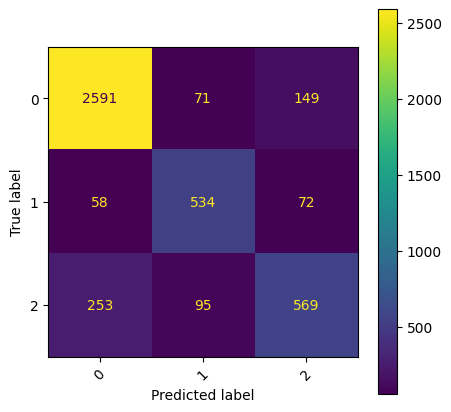

In [28]:
#All the metrics
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

cm = confusion_matrix(data['test']['label'], ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1, 2])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()

In [29]:
Accuracy = accuracy_score(data['test']['label'], ypred, normalize=True)
Precision = precision_score(data['test']['label'], ypred, average = 'macro') # macro calculate the average value of classes.
Recall = recall_score(data['test']['label'], ypred, average = 'macro')
F1_Score = f1_score(data['test']['label'], ypred, average = 'macro')

print('Accuracy : ', Accuracy)
print(" ")
print('Precision : ', Precision)
print(" ")
print('Recall : ', Recall)
print(" ")
print('F1_Score : ', F1_Score)
print(" ")

Accuracy :  0.8410746812386156
 
Precision :  0.7919809455680832
 
Recall :  0.7821515134120669
 
F1_Score :  0.7855706520607736
 
